# Stackoverflow Survey Analysis

This Jupyter Notebook will go through the complete analysis of the Stackoverflow Survey

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
survey_results = pd.read_csv('survey_results_public.csv')

In [4]:
survey_results.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
for column in survey_results.columns:
    print(column)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

## Countries Represented

First let's have a look at the represented countries.

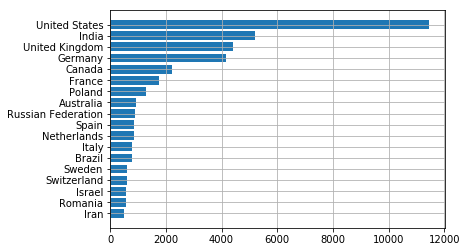

In [52]:
countries = survey_results['Country'].value_counts()
x_vals = list(countries.index)
y_vals = list(countries.values)

THRESH = 500

x_vals = [x for (x,y) in zip(x_vals, y_vals) if y > THRESH]
y_vals = [y for y in y_vals if y > THRESH]

plt.barh(range(0,len(x_vals)), y_vals[::-1]);
plt.yticks(range(0,len(x_vals)), x_vals[::-1]);
plt.grid()

United States is heavily represented, however followed by a large number of other survey participants. Given the pupulation of the United States, it is rather underrepresented in the survey. However, the amount of data allows to look at the different answering behaviors.

In [71]:
survey_results['years_coded'] = [float(str(x).split(' ')[0]) if str(x).split(' ')[0] != 'Less' else 0.0 for x in survey_results['YearsCodedJob']]

In [72]:
us_data = survey_results[survey_results['Country'] == 'United States']
rest_data = survey_results[survey_results['Country'] != 'United States']

In [73]:
selected_columns = [
    'ProgramHobby',
    'EmploymentStatus',
    'FormalEducation',
    'Salary',
    'ExpectedSalary',
    'JobSatisfaction',
    'JobSatisfaction',
    'years_coded'
]

us_data[selected_columns].describe()

,Salary,ExpectedSalary,JobSatisfaction,JobSatisfaction,years_coded
count,3781.000000,468.000000,9322.000000,9322.000000,9422.000000
mean,96194.754635,68535.918544,7.178502,7.178502,8.150287
std,34866.067035,24657.176399,2.134391,2.134391,6.775606
min,5.000000,0.000000,0.000000,0.000000,0.000000
25%,70000.000000,55000.000000,6.000000,6.000000,2.000000
50%,93000.000000,70000.000000,8.000000,8.000000,6.000000
75%,120000.000000,80000.000000,9.000000,9.000000,14.000000
max,197000.000000,180000.000000,10.000000,10.000000,20.000000


In [74]:
us_data[selected_columns].head()

,ProgramHobby,EmploymentStatus,FormalEducation,Salary,ExpectedSalary,JobSatisfaction,JobSatisfaction,years_coded
0,"Yes, both","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN
3,"Yes, both",Employed full-time,Doctoral degree,NaN,NaN,3.0,3.0,9.0
6,"Yes, both",Employed full-time,Master's degree,NaN,NaN,6.0,6.0,8.0
10,"Yes, I program as a hobby",Employed full-time,Bachelor's degree,NaN,NaN,9.0,9.0,11.0
15,"Yes, I program as a hobby","Independent contractor, freelancer, or self-em...",Primary/elementary school,NaN,NaN,8.0,8.0,1.0


In [75]:
rest_data[selected_columns].describe()

,Salary,ExpectedSalary,JobSatisfaction,JobSatisfaction,years_coded
count,9110.000000,2098.000000,31054.000000,31054.000000,31468.000000
mean,39739.994145,25246.962746,6.890610,6.890610,6.125334
std,28483.394768,25209.452116,2.173173,2.173173,5.658561
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17204.301075,2803.787768,6.000000,6.000000,2.000000
50%,37634.408602,19354.838710,7.000000,7.000000,4.000000
75%,56250.000000,39736.899723,8.000000,8.000000,9.000000
max,193750.000000,187500.000000,10.000000,10.000000,20.000000
